<a href="https://colab.research.google.com/github/ABSHYabhi/Aerofit-DescriptiveStatsAndProbability-Business-Case/blob/main/Aerofit_DescriptiveStatsAndProbability_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

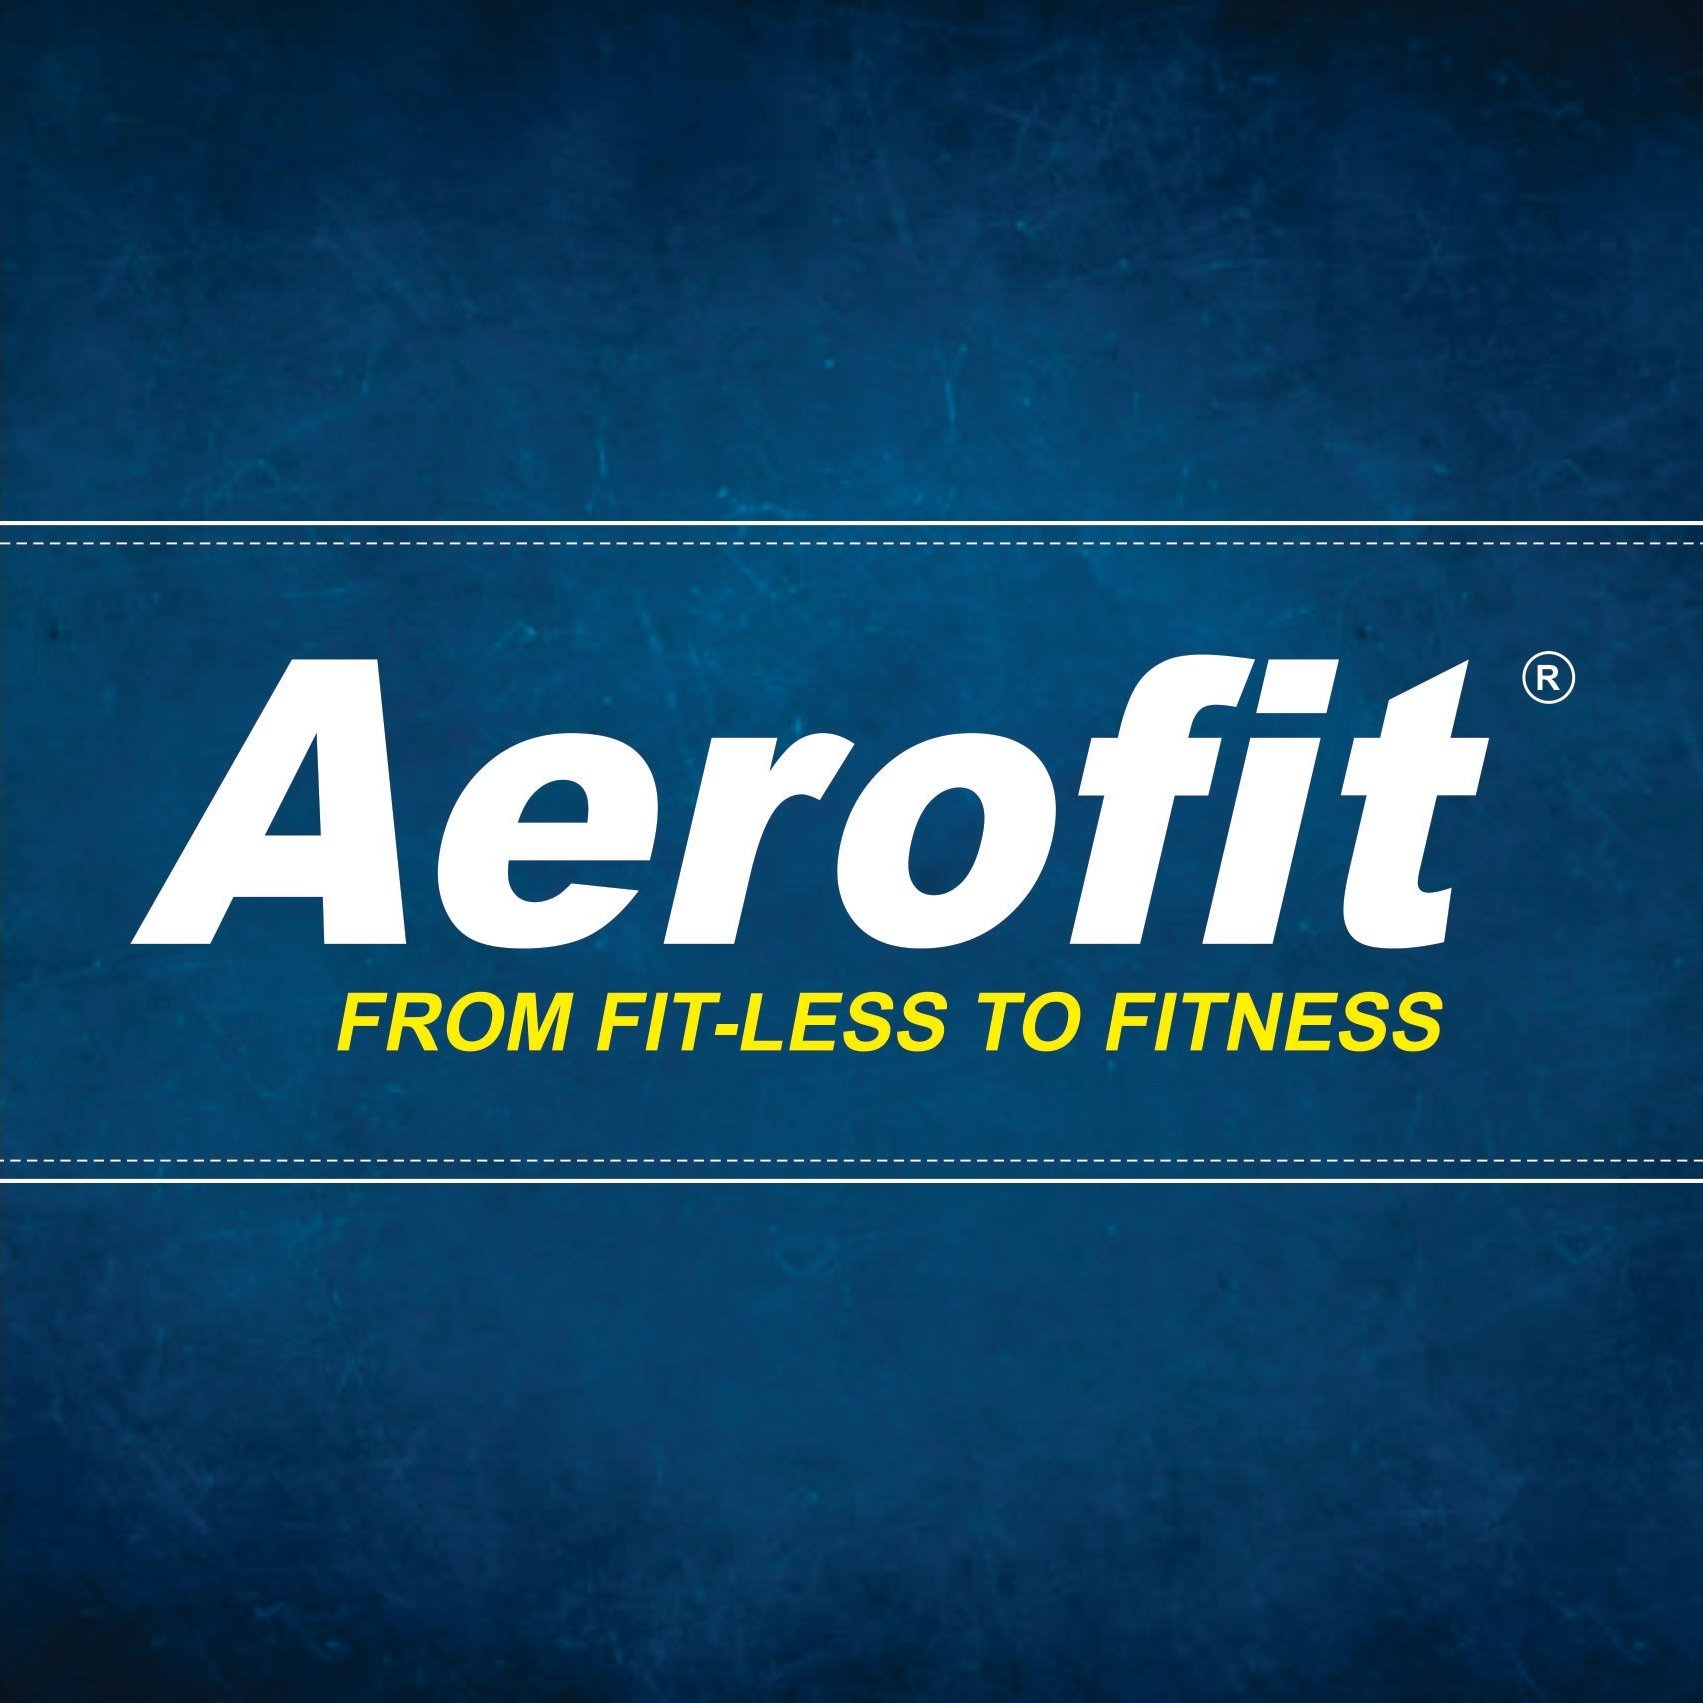

##<ins>**DATA**</ins>

The analysis was done on the data located at -

https://drive.google.com/file/d/1qqXsftdx0I3NL04yntdIispBNGLKqARb/view?usp=sharing

#Libraries
Below are the libraries required for analysing and visualizing data

In [2]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading and initial analysis
Loading the data into Pandas dataframe for easily handling of data

In [3]:
# read the aerofit_treadmill.csv file into a pandas dataframe
!gdown 1qqXsftdx0I3NL04yntdIispBNGLKqARb
df = pd.read_csv('aerofit_treadmill.csv')
# look at the datatypes of the columns
print(df.info())
print('*************************************************\n')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print(f'Number of unique values in each column: \n{df.nunique()}')

Downloading...
From: https://drive.google.com/uc?id=1qqXsftdx0I3NL04yntdIispBNGLKqARb
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 12.5MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
*************************************************

Shape of the dataset is (180, 9)
*************************************************

Number of nan/null values in each column: 
Product          0
Age     

> Insights





A brief examination of the dataset reveals it contains 180 rows and 9 columns, indicating that 180 products have been sold to various customers. The dataset includes customer details such as age, gender, and income. The data types for the product, gender, and marital status columns are “object,” while the remaining columns are of the int64 data type. Additionally, there are no missing or null values in the dataset.

Below is a sample of the data:

In [4]:
# look at the top 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


> Insights


The above table shows the statistics of the data like mean, minimum and maximum value. As we can see there is a large spread in the Income and Miles data.




#Analysis


##<ins>Detecting Outliers</ins>  





###**a. Outliers for every continuous variable**

In [6]:
# helper function to detect outliers
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outliers = df[(df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))]
    return outliers

In [7]:
numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']
num_of_outliers_per_column = []
for column in numerical_columns:
    print(f'Outliers of \'{column}\' column are:')
    outliers = detectOutliers(df[column])
    print(outliers)
    num_of_outliers_per_column.append(len(outliers))

Outliers of 'Age' column are:
78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64
Outliers of 'Education' column are:
156    20
157    21
161    21
175    21
Name: Education, dtype: int64
Outliers of 'Usage' column are:
154    6
155    6
162    6
163    7
164    6
166    7
167    6
170    6
175    6
Name: Usage, dtype: int64
Outliers of 'Income' column are:
159     83416
160     88396
161     90886
162     92131
164     88396
166     85906
167     90886
168    103336
169     99601
170     89641
171     95866
172     92131
173     92131
174    104581
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, dtype: int64
Outliers of 'Miles' column are:
23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200
Name: Miles, dtype: int64


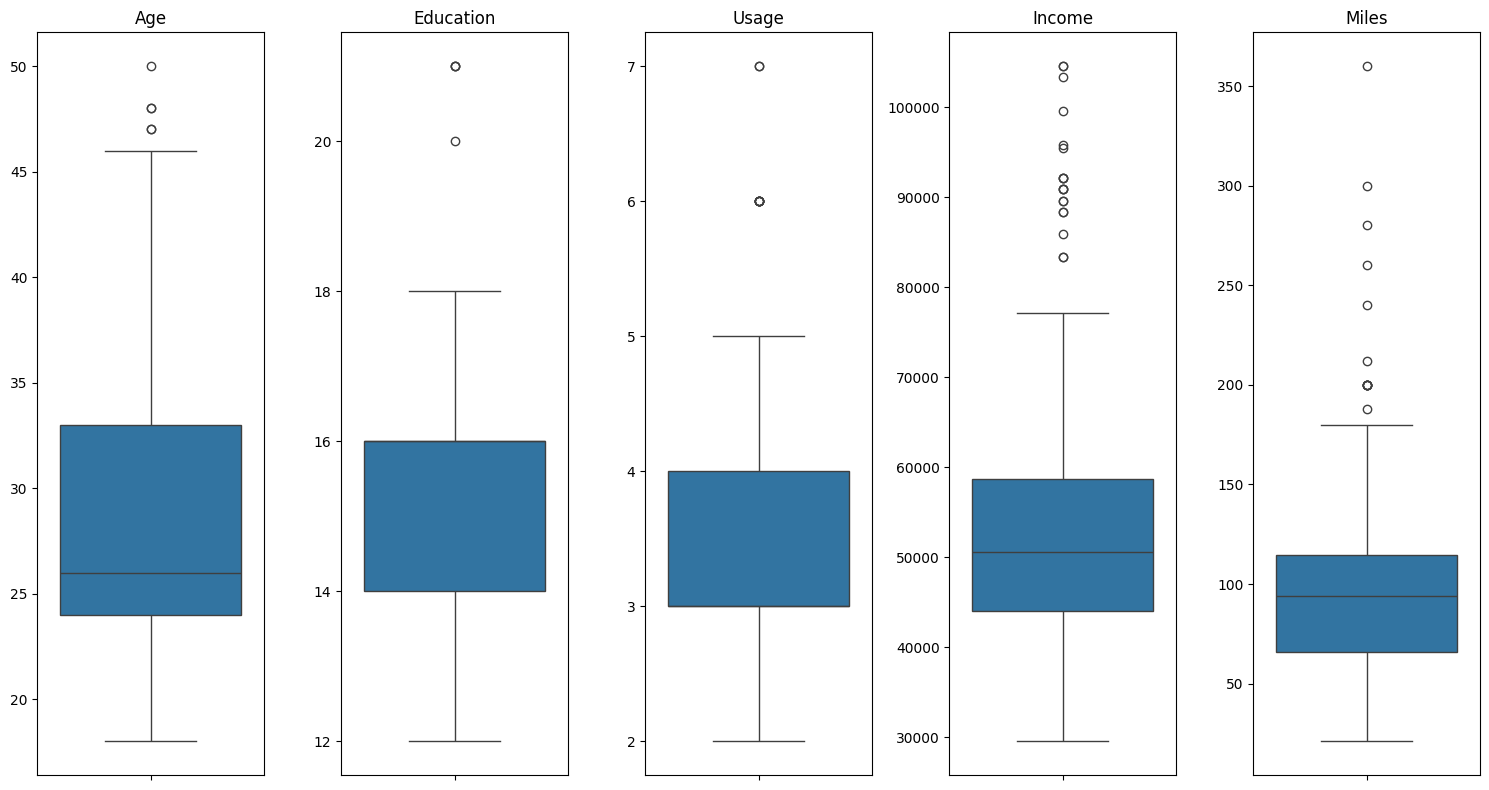

In [8]:
# Define the numerical columns
numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Create a subplot for each column
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.ylabel('')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



In [9]:
for idx in range(len(numerical_columns)):
    print(f'The column \'{numerical_columns[idx]}\' has {num_of_outliers_per_column[idx]} outliers')

The column 'Age' has 5 outliers
The column 'Education' has 4 outliers
The column 'Usage' has 9 outliers
The column 'Income' has 19 outliers
The column 'Miles' has 13 outliers


###**b. Clip data between 5 and 95 percentile**

In [10]:
for column in numerical_columns:
    clip_min = df[column].quantile(0.05)
    clip_max = df[column].quantile(0.95)
    df[column] = np.clip(df[column], clip_min, clip_max)

>The data is limited between the 5 and 95 percentile of each column so as to avoid any bias during analysis

#Effect of customer features on product purchased

###**a. Relationship between the categorical variables and the product models.**

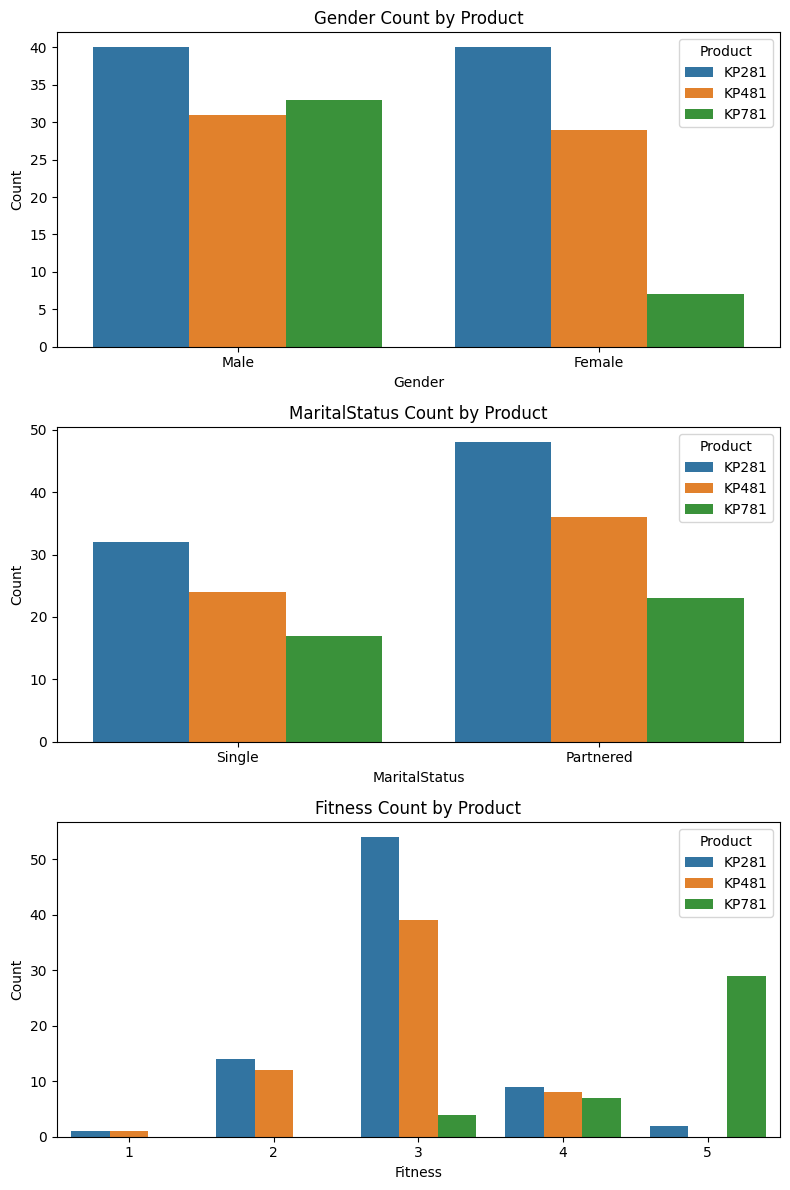

In [11]:
categorical_columns = ['Gender', 'MaritalStatus', 'Fitness']
plt.figure(figsize=(8, len(categorical_columns) * 4))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)  # Arrange vertically
    sns.countplot(data=df, x=column, hue='Product')
    plt.title(f'{column} Count by Product')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


>Insights

**Both the male and female** customers prefer the product **KP281**. In case of **female** customers, we can see that **majority** of them prefer **KP281** followed by **KP481** and **KP781** is the **least prefered product among females**.
**Partnered customers** tend to **buy more products** compared to Single customers across all product models.**bold text**
**Majority** of the people have rated themselves **moderate fitness**. Interestingly, people who have bought the advanced level treadmill, **KP781**, have rated themselves **high fitness**.

###b. Relationship between the continuous variables and the product models.


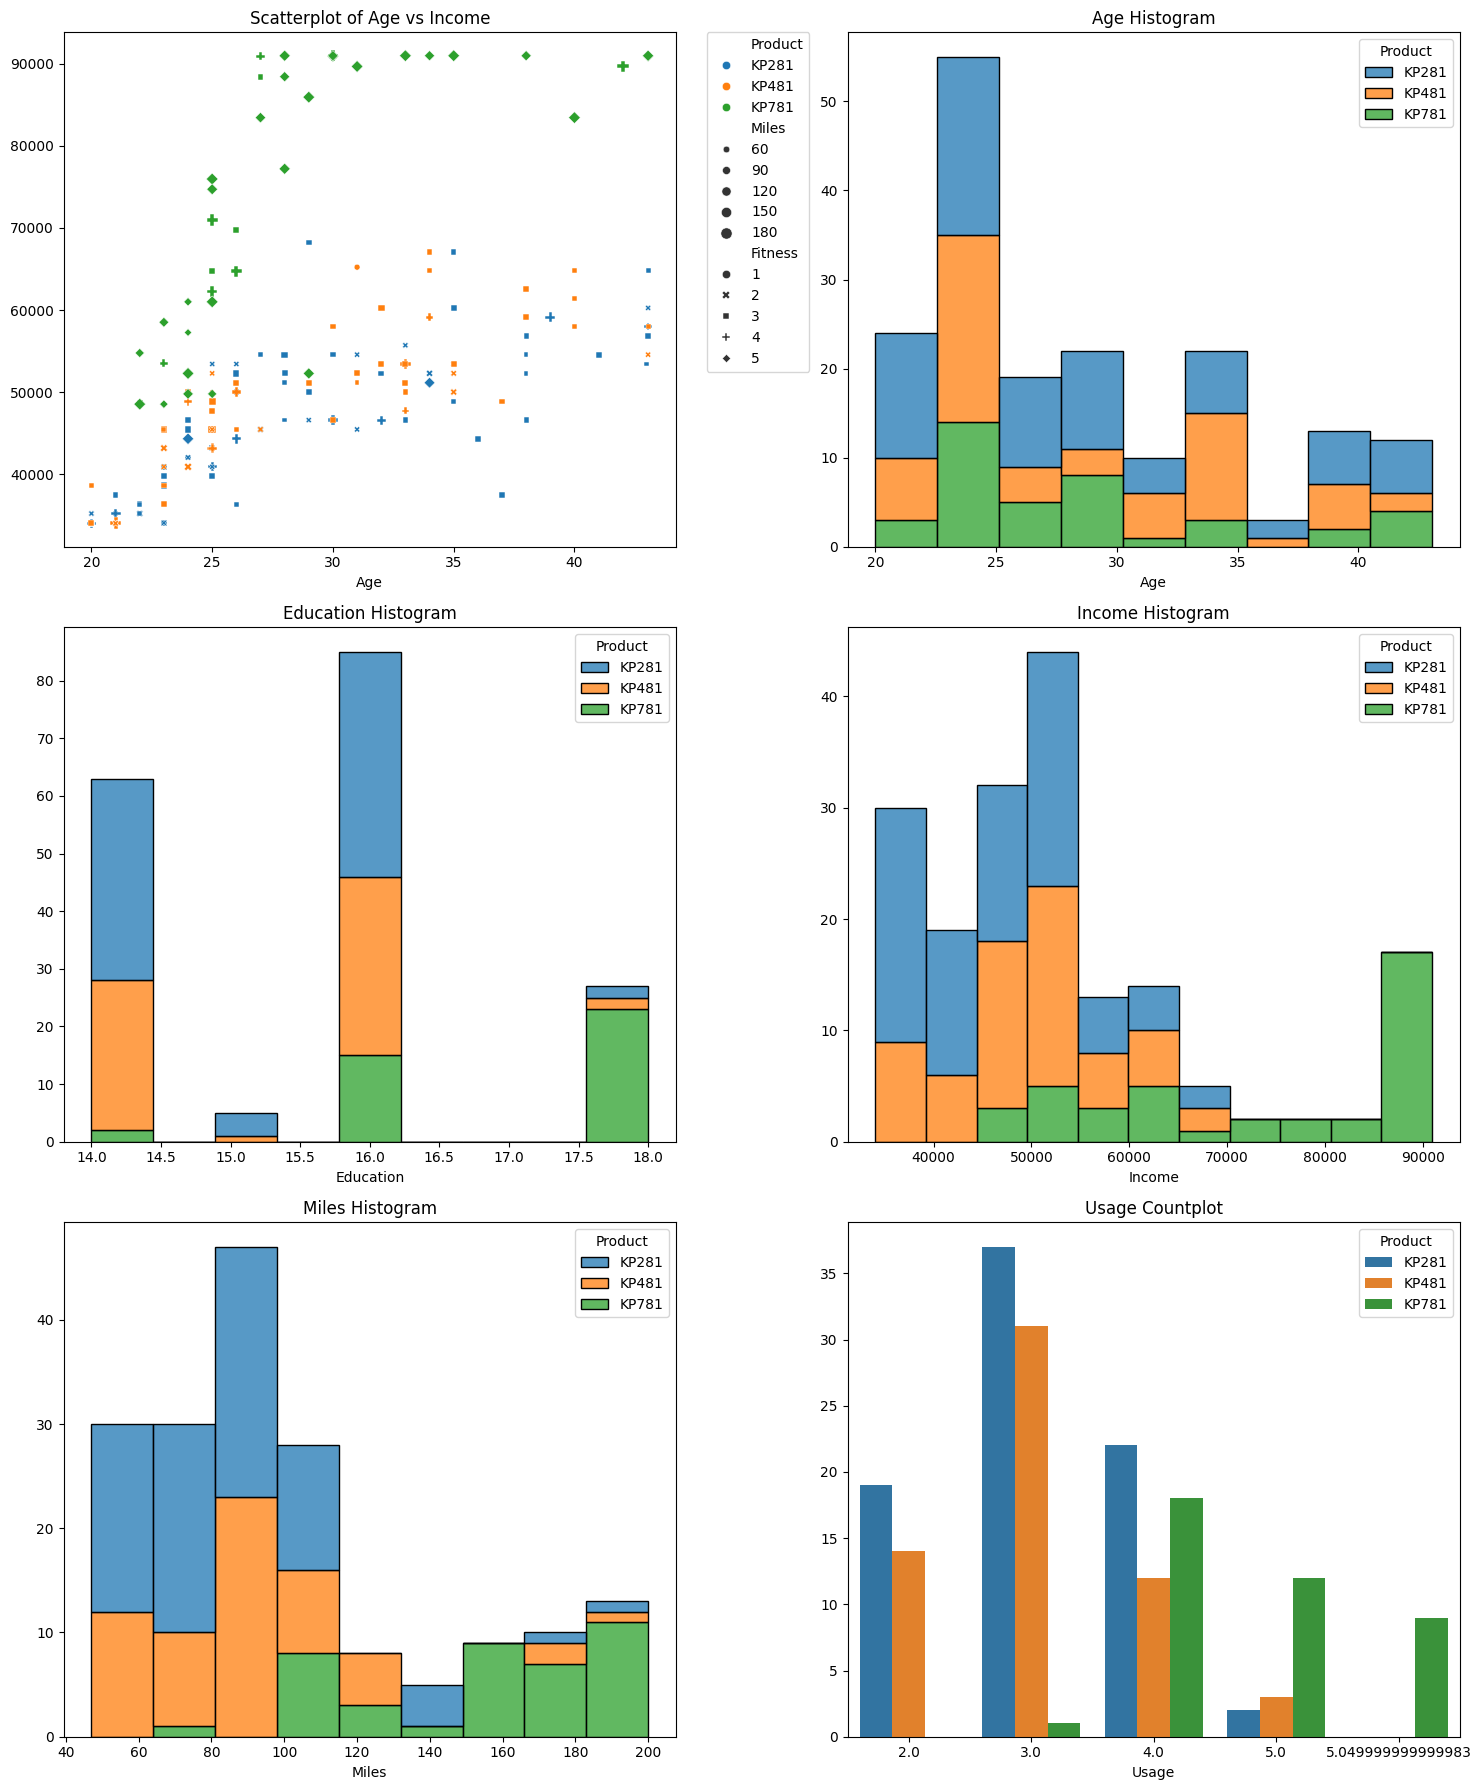

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Scatter plot
sns.scatterplot(data=df, x='Age', y='Income', hue='Product', size='Miles', style='Fitness', ax=axes[0, 0])
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes[0, 0].set_title('Scatterplot of Age vs Income')
axes[0, 0].set_ylabel('')

# Histograms
sns.histplot(data=df, x='Age', hue='Product', multiple="stack", ax=axes[0, 1])
axes[0, 1].set_title('Age Histogram')
axes[0, 1].set_ylabel('')

sns.histplot(data=df, x='Education', hue='Product', multiple="stack", ax=axes[1, 0])
axes[1, 0].set_title('Education Histogram')
axes[1, 0].set_ylabel('')

sns.histplot(data=df, x='Income', hue='Product', multiple="stack", ax=axes[1, 1])
axes[1, 1].set_title('Income Histogram')
axes[1, 1].set_ylabel('')

sns.histplot(data=df, x='Miles', hue='Product', multiple="stack", ax=axes[2, 0])
axes[2, 0].set_title('Miles Histogram')
axes[2, 0].set_ylabel('')

# Countplot
sns.countplot(data=df, x='Usage', hue='Product', ax=axes[2, 1])
axes[2, 1].set_title('Usage Countplot')
axes[2, 1].set_ylabel('')

plt.tight_layout()
plt.show()



>Insights

Customers with higher income and better fitness level prefer to buy KP781 and use it more often and hence run more miles. More comments from the above analysis are added in the customer profiling section.

#Probability

###a. Marginal probability of each product

In [13]:
pd.crosstab(df['Product'], df['Product'], normalize=True)

Product,KP281,KP481,KP781
Product,,,
KP281,0.444444,0.000000,0.000000
KP481,0.000000,0.333333,0.000000
KP781,0.000000,0.000000,0.222222


>**44.4%** of customers have purchased **KP281**, **33.3%** have purchased **KP481** and **22.2%** have purchased **KP781**

###b. Probability that the customer buys a product based on each categorical column

In [14]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


>Of all the 180 customers who brought a product, 76 were female and 104 were male. So, the **probability of a female customer buying a product is 42.2%** (76/180) and that of **a male customer buying a product is 57.8%** (104/180)

In [15]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


>Similarly, the **probability of a partnered customer buying a product is 59.4%** (107/180) and that of a **single customer buying a product is 40.6%** (73/180)

In [16]:
pd.crosstab(df['Product'], df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


>Based on the self rated fitness level, the **probability of a moderately fit customer buying a product is high, 53.9%** (97/180) compared to other fitness level customers

###c. Conditional probability

- **Gender:** Female customers are more likely to purchase KP281, with a probability of 52.6% (40/76), compared to just 9.2% (7/76) for KP781. In contrast, male customers show a more balanced distribution among the products, with a slightly higher probability of purchasing KP281 (38.5% or 40/104) over KP481 (29.8% or 31/104) and KP781 (31.7% or 33/104). This suggests that while KP281 is the most preferred product for both genders, men tend to have more diverse preferences across the product range.

- **Marital Status:** Partnered customers are more likely to buy KP281 (44.9% or 48/107) than KP481 (33.6% or 36/107) or KP781 (21.5% or 23/107). Similarly, single customers also prefer KP281 (43.8% or 32/73), followed by KP481 (32.9% or 24/73) and KP781 (23.3% or 17/73). These insights indicate that KP281 appeals to both partnered and single customers, with KP481 being the next most favored option.

- **Fitness Level:** Customers with a moderate fitness level (self-rated as 3) are significantly more likely to buy KP281, with a probability of 55.7% (54/97), suggesting that this product aligns well with moderately fit customers. Meanwhile, extremely fit customers (self-rated as 5) overwhelmingly prefer KP781, with a striking 93.5% (29/31), highlighting a strong product-market fit for KP781 in this fitness category.



#Correlation among different factors

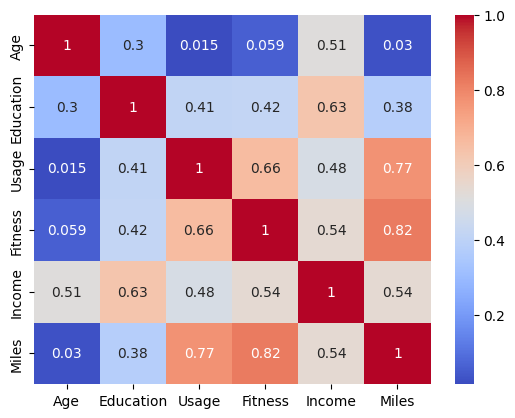

In [17]:
subset_df = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

>Insights

- **Fitness and Miles:** As expected, there is a strong positive correlation (0.82) between Fitness and Miles. This confirms that individuals with higher fitness levels tend to run more miles, which aligns with the intuitive expectation that fitter individuals are more capable of covering greater distances.

- **Usage and Miles:** The correlation between Usage and Miles is also quite strong, at 0.77. This indicates that customers who use the treadmill more frequently tend to log more miles, which highlights consistent usage leading to increased mileage.

- **Age:** There is minimal correlation between Age and other factors such as Usage (0.015), Miles (0.03), and Fitness (0.059). This supports the conclusion that fitness levels and treadmill usage are not dependent on age, emphasizing that people of any age can maintain high fitness levels.

- **Education and Income:** Interestingly, there is a moderate positive correlation (0.63) between Education and Income, which is expected as higher education levels often correlate with higher income levels.

- **Income and Fitness:** There is a moderate correlation (0.54) between Income and Fitness, suggesting that wealthier customers may have more access to resources (e.g., gym memberships, personal trainers) that improve their fitness.

#Customer profiling and recommendation

###a. Customer profilings for each and every product

In [18]:
kp281_df = df[df['Product']=='KP281']
kp481_df = df[df['Product']=='KP481']
kp781_df = df[df['Product']=='KP781']
print('Mean of KP281 features :\n', kp281_df.describe().loc['mean'])
print('\nMean of KP481 features :\n', kp481_df.describe().loc['mean'])
print('\nMean of KP781 features :\n', kp781_df.describe().loc['mean'])

Mean of KP281 features :
 Age             28.42750
Education       15.12500
Usage            3.08750
Fitness          2.96250
Income       46584.31125
Miles           83.12500
Name: mean, dtype: float64

Mean of KP481 features :
 Age             28.801667
Education       15.183333
Usage            3.066667
Fitness          2.900000
Income       49046.607500
Miles           88.500000
Name: mean, dtype: float64

Mean of KP781 features :
 Age             28.82875
Education       17.05000
Usage            4.51125
Fitness          4.62500
Income       73908.28125
Miles          155.90000
Name: mean, dtype: float64


>Insights

**<ins>KP281 Customer Profile:</ins>**


- **Age:** Preferred by customers of all ages, with an average age of 28.4 years.

- **Gender:** Equally preferred by both male and female customers.

- **Education:** Mostly chosen by customers with less than 16 years of education.

- **Marital Status:** Primarily preferred by partnered customers.

- **Usage:** Ideal for customers who use the treadmill less than 4 times per week.

- **Income:** Attracts low-income customers with an average income of $46,000.

- **Fitness:** Mostly preferred by customers with a fitness level below 3.

- **Miles:** Typically favored by those expecting to walk/run an average of 83 miles
per week.


**<ins>KP481 Customer Profile:</ins>**


- **Age:** Preferred by customers of all ages, with an average age of 28.8 years.

- **Gender:** Equally preferred by both male and female customers.

- **Education**: **bold text** Similar to KP281, it is chosen by customers with less than 16 years of education.

- **Marital Status:** Mostly preferred by partnered customers.

- **Usage:** Suitable for customers who use the treadmill less than 4 times per week.

- **Income:** Attracts low-income customers with a slightly higher average income of $49,000.

- **Fitness:** Preferred by customers with a fitness level below 3.

- **Miles:** Typically chosen by those expecting to walk/run an average of 88 miles per week.


**<ins>KP781 Customer Profile:</ins>**


- **Age:** Preferred by customers of all ages, with an average age of 28.8 years.

- **Gender:** Primarily favored by male customers.

- **Education:** Mostly chosen by customers who have completed more than 16 years of
education.

- **Marital Status:** Primarily preferred by partnered customers.

- **Usage:** Suited for customers who use the treadmill more than 4 times per week.

- **Income:** Attracts high-income customers with an average income of $74,000.

- **Fitness:** Mostly preferred by customers with a fitness level of 3 or higher.

- **Miles:** Typically favored by those expecting to walk/run an average of 156 miles per week.

###b. Recommendation

**<ins>KP281 Recommendation:</ins>**


- **Target Audience:** This product appeals to younger, budget-conscious customers with moderate fitness levels.
- **Marketing Strategy:** Emphasize the treadmill’s affordability and suitability for moderate fitness needs. Campaigns should highlight features that appeal to younger people just starting their fitness journey or those looking for low-maintenance fitness equipment.
- **Sales Channels:** Focus on online platforms or budget retail stores that appeal to younger, low-income groups.
- **Partnerships:** Collaborate with fitness influencers or communities that cater to individuals looking to maintain fitness without extreme workout routines.



**<ins>KP481 Recommendation:</ins>**


- **Target Audience:** Similar to KP281, this product attracts low-income, younger individuals with moderate fitness needs.
- **Marketing Strategy:** Highlight how KP481 offers slightly better features than KP281, while still being budget-friendly. Position it as an upgrade for those looking to improve their fitness routine.
- **Product Bundling:** Offer it as part of fitness kits or memberships at budget gyms, appealing to customers looking to upgrade without breaking the bank.
- **Incentives:** Provide promotional discounts or installment plans to further appeal to the low-income demographic.


**<ins>KP781 Recommendation:</ins>**


- **Target Audience:** This product caters to a wealthier, highly-educated, and predominantly male audience with higher fitness expectations.
- **Marketing Strategy:** Highlight the premium features of the KP781, emphasizing how it supports intensive fitness routines. Position it as a product for those who are serious about running and achieving top fitness goals.
- **Sales Channels:** Focus on high-end retail stores and online platforms that attract affluent customers. Collaborate with elite gyms, sports stores, and luxury fitness brands.
- **Partnerships:** Partner with professional athletes or fitness trainers who cater to high-income clients. Sponsoring events like marathons or fitness competitions could also raise visibility.




**<ins>General Insights:</ins>**

- **Age:** Across all products, customers of all age groups seem to be equally represented, suggesting that age-neutral marketing would be effective.
- **Income Segmentation:** KP281 and KP481 should be marketed as budget-friendly options, while KP781 should be targeted toward high-income customers.
- **Fitness Focus:** KP781 caters to those with higher fitness levels, so premium fitness features like advanced tracking and performance metrics should be emphasized.